In [1]:
import spotipy as sp
from spotipy.oauth2 import SpotifyClientCredentials
import getpass
import pandas as pd
import numpy as np
import requests
from time import sleep
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import pairwise_distances_argmin_min
from time import sleep

#Request the user to input client id and client secret
client_id = getpass.getpass('client_id: ')
client_secret = getpass.getpass('client_secret: ')

#Initialize SpotiPy with user credentias
sp = sp.Spotify(auth_manager=SpotifyClientCredentials(client_id= client_id,
                                                           client_secret= client_secret))

In [2]:
# These are the spotify playlists that I chose
spotify_playlists = {
'anime' : '37i9dQZF1DX0hAXqBDwvwI',
'top_hits': '37i9dQZF1DXcBWIGoYBM5M', 
'sleep': '37i9dQZF1DWZd79rJ6a7lp',
'lofi' : '37i9dQZF1DWWQRwui0ExPn', 
'reading': '37i9dQZF1DWZwtERXCS82H',
'running' : '37i9dQZF1DWT6anPZiHuxz',
'yoga': '37i9dQZF1DX9uKNf5jGX6m',
'indie_pop' : '37i9dQZF1DWWEcRhUVtL8n',
'rock': '37i9dQZF1DWXRqgorJj26U',
'jazz_classics': '37i9dQZF1DXbITWG1ZJKYt',
'rap_caviar' : '37i9dQZF1DX0XUsuxWHRQd',
'viva_latino' : '37i9dQZF1DX10zKzsJ2jva',
'hot_country': '37i9dQZF1DX1lVhptIYRda',
'90s_country': '37i9dQZF1DWVpjAJGB70vU'}

#I make a list with their playlists IDs 
playlists = []
for key in spotify_playlists:
    playlists.append(spotify_playlists[key])
playlists

['37i9dQZF1DX0hAXqBDwvwI',
 '37i9dQZF1DXcBWIGoYBM5M',
 '37i9dQZF1DWZd79rJ6a7lp',
 '37i9dQZF1DWWQRwui0ExPn',
 '37i9dQZF1DWZwtERXCS82H',
 '37i9dQZF1DWT6anPZiHuxz',
 '37i9dQZF1DX9uKNf5jGX6m',
 '37i9dQZF1DWWEcRhUVtL8n',
 '37i9dQZF1DWXRqgorJj26U',
 '37i9dQZF1DXbITWG1ZJKYt',
 '37i9dQZF1DX0XUsuxWHRQd',
 '37i9dQZF1DX10zKzsJ2jva',
 '37i9dQZF1DX1lVhptIYRda',
 '37i9dQZF1DWVpjAJGB70vU']

In [3]:
playlist_tracks = []
# define a function to extract the track information for each track in a playlist
def get_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify", playlist_id)
    tracks = results['items']
    
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
    return tracks

#Combining all lists in one
playlist_tracks = []
for i in range(len(playlists)):
    playlist_tracks = playlist_tracks + (get_tracks(playlists[i]))
len(playlist_tracks) # to show the number of songs in the playlist

2903

In [ ]:
#I create empty lists for the Features I want in my DF
features = ['danceability','energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
title = []
artist = []
#Creating one empty list for each Audio Feature
for k in range(len(features)): 
    (locals()[features[k]]) = []

#With this first loop I get the general features and collect those which I need (title, artist)
for a in range(len(playlist_tracks)):
    title.append(playlist_tracks[a]['track']['name'])
    artist.append(playlist_tracks[a]['track']['artists'][0]['name'])
    song_uri = playlist_tracks[a]["track"]["uri"]
    audio = sp.audio_features(song_uri)
    #With this second loop I get and collect the audio Features I need
    for i in range(len(features)): 
        (locals()[features[i]]).append(audio[0][features[i]])

In [ ]:
af = pd.DataFrame({"title":title,
                        "artist":artist,
                        "danceability":danceability,
                        "energy":energy,
                        "key":key,
                        "loudness":loudness,
                        "mode":mode,
                        "speechiness":speechiness,
                        "acousticness":acousticness,
                        "instrumentalness":instrumentalness,
                        "liveness":liveness,
                        "valence":valence,
                        "tempo":tempo
                      })
af.head(20)

,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,怪物,YOASOBI,0.627,0.824,1,-3.419,1,0.1180,0.069900,0.000066,0.3100,0.774,169.935
1,廻廻奇譚,Eve,0.585,0.910,5,-3.703,0,0.0917,0.013800,0.000000,0.1900,0.602,92.591
2,ピースサイン,Kenshi Yonezu,0.577,0.941,8,-2.960,1,0.0822,0.007820,0.000000,0.3250,0.556,100.026
3,残響散歌,Aimer,0.367,0.896,11,-4.002,1,0.0910,0.000627,0.000000,0.2070,0.380,170.863
4,紅蓮華,LiSA,0.544,0.979,4,-2.800,0,0.1530,0.003360,0.000116,0.0775,0.310,135.001
5,LOST IN PARADISE,ALI,0.648,0.904,6,-4.565,0,0.0786,0.096100,0.000002,0.0629,0.728,121.994
6,The Rumbling,SiM,0.459,0.878,5,-1.399,0,0.0688,0.000056,0.000307,0.3710,0.494,144.852
7,ブルーバード,Ikimonogakari,0.536,0.966,6,-2.929,0,0.0558,0.121000,0.000000,0.0477,0.849,152.076
8,unravel,TK from Ling tosite sigure,0.507,0.889,7,-2.755,0,0.0860,0.049500,0.000000,0.0983,0.333,135.021
9,Cry Baby,Official HIGE DANdism,0.318,0.902,1,-4.605,1,0.1310,0.011600,0.000000,0.3930,0.437,199.844


In [ ]:
af_ = af.drop(['title','artist'], axis =1)

# Model building for Clustering. Creating scaler
x_transformer = StandardScaler().fit(af_)
x_prep = x_transformer.transform(af_)
X_prep_df = pd.DataFrame(x_prep, columns = af_.columns)


In [ ]:
X_prep_df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.488851,1.617582,-1.137375,1.261837,0.771362,0.602818,-1.437033,-1.329992,1.528920,1.559073,1.766889
1,0.293670,1.917852,-0.008454,1.232401,-1.296407,0.255656,-1.590217,-1.330151,0.396965,0.888714,-0.499826
2,0.256493,2.026089,0.838237,1.309412,0.771362,0.130255,-1.606545,-1.330151,1.670415,0.709432,-0.281929
3,-0.719414,1.868971,1.684927,1.201410,0.771362,0.246416,-1.626186,-1.330151,0.557325,0.023484,1.794085
4,0.103136,2.158766,-0.290684,1.325996,-1.296407,1.064821,-1.618724,-1.329870,-0.664243,-0.249337,0.743081
5,0.586442,1.896903,0.273776,1.143055,-1.296407,0.082735,-1.365493,-1.330146,-0.801964,1.379791,0.361886
6,-0.291874,1.806124,-0.008454,1.471208,-1.296407,-0.046626,-1.627745,-1.329407,2.104331,0.467791,1.031783
7,0.065959,2.113376,0.273776,1.312625,-1.296407,-0.218227,-1.297503,-1.330151,-0.945345,1.851380,1.243496
8,-0.068809,1.844530,0.556006,1.330660,-1.296407,0.180415,-1.492736,-1.330151,-0.468037,-0.159696,0.743667
9,-0.947125,1.889920,-1.137375,1.138909,0.771362,0.774419,-1.596224,-1.330151,2.311856,0.245638,2.643429


### Using Silhouette to determine K value

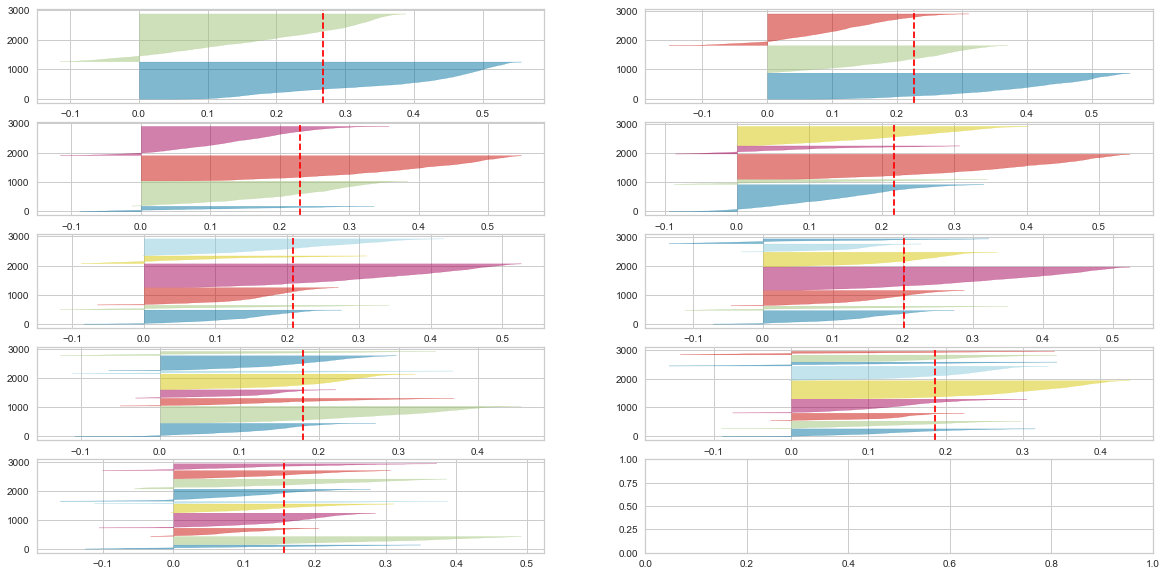

In [ ]:
fig, ax = plt.subplots(5, 2, figsize=(20,10))
for i in [2, 3, 4, 5, 6, 7, 8, 9 ,10]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_prep_df)

#### Finding K value with Yellowbrick

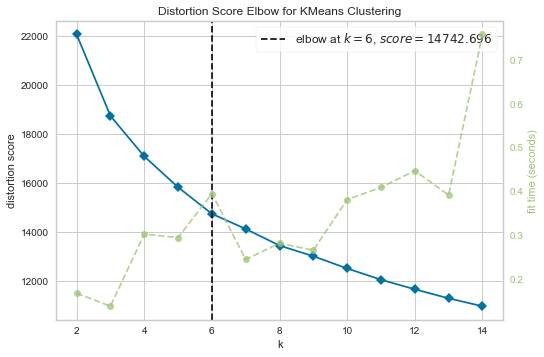

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(km, k=(2,15))
visualizer.fit(X_prep_df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(x_prep)
# Predicting / assigning the clusters:
clusters = kmeans.predict(x_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()
af_2 = X_prep_df.copy()
af_2['cluster'] = clusters
af_2['title'] = af['title']
af_2['artist'] = af['artist']

af_2



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,title,artist
0,0.488851,1.617582,-1.137375,1.261837,0.771362,0.602818,-1.437033,-1.329992,1.528920,1.559073,1.766889,3,怪物,YOASOBI
1,0.293670,1.917852,-0.008454,1.232401,-1.296407,0.255656,-1.590217,-1.330151,0.396965,0.888714,-0.499826,6,廻廻奇譚,Eve
2,0.256493,2.026089,0.838237,1.309412,0.771362,0.130255,-1.606545,-1.330151,1.670415,0.709432,-0.281929,3,ピースサイン,Kenshi Yonezu
3,-0.719414,1.868971,1.684927,1.201410,0.771362,0.246416,-1.626186,-1.330151,0.557325,0.023484,1.794085,6,残響散歌,Aimer
4,0.103136,2.158766,-0.290684,1.325996,-1.296407,1.064821,-1.618724,-1.329870,-0.664243,-0.249337,0.743081,6,紅蓮華,LiSA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,-0.105987,-0.557627,1.684927,0.357398,0.771362,-0.590470,0.605686,-1.330148,-0.046384,-0.545541,-1.099211,0,How Can I Help You Say Goodbye,Patty Loveless
2867,0.377319,1.317313,-0.008454,1.084390,0.771362,-0.611590,-0.554795,-1.330146,1.151602,0.463894,-0.079799,3,Ain't That Lonely Yet,Dwight Yoakam
2868,0.800212,1.512837,-0.008454,0.930990,0.771362,-0.573309,-1.051754,-1.330151,1.793043,1.142047,-0.352383,3,How Do I Get There,Deana Carter
2869,0.112430,0.077828,-0.572915,0.526034,0.771362,-0.595750,0.204296,-1.330151,-0.733104,-0.194772,-1.062577,0,I Do,Paul Brandt


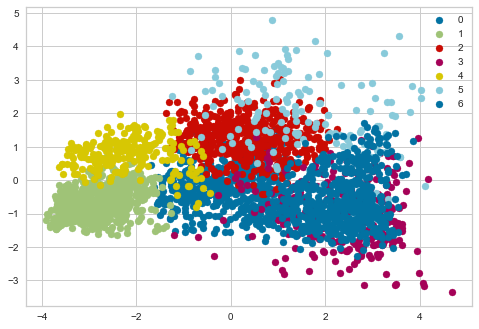

In [ ]:
from sklearn.decomposition import PCA

# Transform the data into 2D so we can see
pca = PCA(2) 
X_2D = pca.fit_transform(X_prep_df.select_dtypes(np.number))
kmeans_2 = KMeans(n_clusters=7, random_state=1234)
kmeans_2.fit(X_2D)
clusters_2d = kmeans_2.predict(X_2D)

labels = np.unique(clusters_2d)

for i in labels:
    plt.scatter(X_2D[clusters_2d == i , 0] , X_2D[clusters_2d == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
af_2.to_csv('af_2.csv')
af_2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,title,artist
0,0.488851,1.617582,-1.137375,1.261837,0.771362,0.602818,-1.437033,-1.329992,1.528920,1.559073,1.766889,3,怪物,YOASOBI
1,0.293670,1.917852,-0.008454,1.232401,-1.296407,0.255656,-1.590217,-1.330151,0.396965,0.888714,-0.499826,6,廻廻奇譚,Eve
2,0.256493,2.026089,0.838237,1.309412,0.771362,0.130255,-1.606545,-1.330151,1.670415,0.709432,-0.281929,3,ピースサイン,Kenshi Yonezu
3,-0.719414,1.868971,1.684927,1.201410,0.771362,0.246416,-1.626186,-1.330151,0.557325,0.023484,1.794085,6,残響散歌,Aimer
4,0.103136,2.158766,-0.290684,1.325996,-1.296407,1.064821,-1.618724,-1.329870,-0.664243,-0.249337,0.743081,6,紅蓮華,LiSA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,-0.105987,-0.557627,1.684927,0.357398,0.771362,-0.590470,0.605686,-1.330148,-0.046384,-0.545541,-1.099211,0,How Can I Help You Say Goodbye,Patty Loveless
2867,0.377319,1.317313,-0.008454,1.084390,0.771362,-0.611590,-0.554795,-1.330146,1.151602,0.463894,-0.079799,3,Ain't That Lonely Yet,Dwight Yoakam
2868,0.800212,1.512837,-0.008454,0.930990,0.771362,-0.573309,-1.051754,-1.330151,1.793043,1.142047,-0.352383,3,How Do I Get There,Deana Carter
2869,0.112430,0.077828,-0.572915,0.526034,0.771362,-0.595750,0.204296,-1.330151,-0.733104,-0.194772,-1.062577,0,I Do,Paul Brandt


In [ ]:
def rs(data):
    song_choice = input('Give me a song name, bestie 	<(￣︶￣)>')
    results = sp.search(song_choice, type = 'track', limit=1)
    song_uri = results['tracks']['items'][0]['uri']
    features = sp.audio_features(song_uri) 
    features_df = pd.DataFrame(features)
    features_df = features_df.select_dtypes(np.number)
    features_df = features_df.drop(['duration_ms', 'time_signature'], axis=1)
    x_new = x_transformer.transform(features_df)
    x_new = pd.DataFrame(x_new)
    cluster_new = kmeans.predict(x_new)
    df_cluster = af_2[af_2['cluster'] == cluster_new[0]][af_.columns]
    
    closest, _ = pairwise_distances_argmin_min(x_new, df_cluster)
    #print(data.loc[closest[0]]['title'], data.loc[closest[0]]['artist'])
    return (data.loc[closest[0]]['title'], data.loc[closest[0]]['artist'])


In [ ]:
rs(af_2)

('Etta', 'Mvdk')